# Exercise 1.1 

## Import Libraries
Python requires importing libraries and functions you need to access specific tools like science (scipy), linear algebra (numpy), and graphics (matplotlib)

In [17]:
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np

## Load Images
Make sure you extract the ```matlab.zip``` file to the same directory as this notebook so there is a ```data/``` directory (or fix the paths after the ```imread``` command

In [4]:
a=imread('data/scroll.tif')
b=imread('data/wood.tif')
c=imread('data/asphalt_gray.tif')

## Showing images

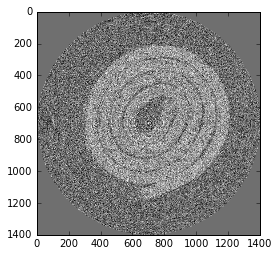

In [8]:
%matplotlib inline
# setup the plotting environment
plt.imshow(a, cmap = 'gray') # show a single image

### Subplots
Here we show multiple subplots within a single figure

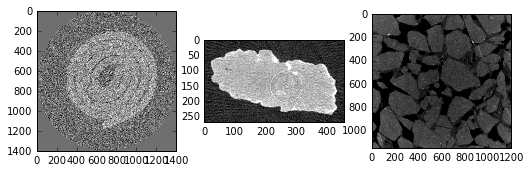

In [15]:
%matplotlib inline
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8.5,5))
ax1.imshow(a, cmap = 'gray')
ax2.imshow(b, cmap = 'gray')
ax3.imshow(c, cmap = 'gray')

## Compute SNR
We can compute the SNR by looking at the ratio of the mean to the standard deviation in a region that is supposed to be constant

$$ SNR = \frac{\mu_{img}}{\sigma_{img}} $$


SNR for A_1 is 2.79120835802


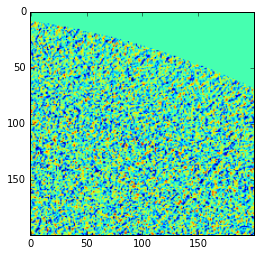

In [19]:
# Identify the region
x1 = 0
x2 = 200
y1 = 800
y2 = 1000

# extract a sub image
subA1=a[x1:x2,y1:y2];
snrA1=np.mean(subA1)/np.std(subA1) # compute the snr
print("SNR for A_1 is {}".format(snrA1))
plt.imshow(subA1)

## __Tasks__
1. Find a second region in a
1. Repeat the procedure with images b and c

# Exercise 1.2
## Load the phantom image
The ```np.mean``` command with the argument 2 averages across the 2 dimension (0 is x, 1 is y, 2 is color) for these images

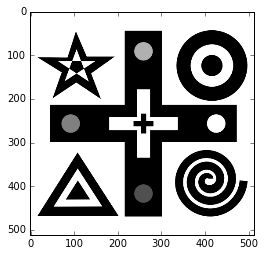

In [24]:
d=np.mean(imread('data/testpattern.png'),2)
plt.imshow(d, cmap= 'gray')

## Create noisy image
Change the scale values so the plot is correct

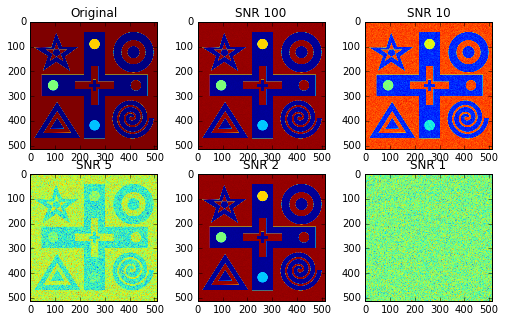

In [37]:
from numpy.random import randn
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3, figsize=(8.5,5))
ax1.imshow(d)
ax1.set_title('Original')

scale = 1 ;
d_snr100=d+scale*randn(*d.shape);
ax2.imshow(d_snr100)
ax2.set_title('SNR 100')

scale = 10 
d_snr10=d+scale*randn(*d.shape);
ax3.imshow(d_snr10)
ax3.set_title('SNR 10')

scale = 100 
d_snr5=d+scale*randn(*d.shape);
ax4.imshow(d_snr5)
ax4.set_title('SNR 5')

scale = 1000 
d_snr2=d+scale*randn(*d.shape);
ax5.imshow(d_snr100)
ax5.set_title('SNR 2')

scale = 5000 
d_snr1=d+scale*randn(*d.shape);
ax6.imshow(d_snr1)
ax6.set_title('SNR 1')


The rest of the exercise as Matlab code, look at the functions in _scipy_ and _skimage_ to finish the execises 

```
%% Filter the images
% Exercise 2.1 Uniform

figure(3)

% Size of the filter window
N=[3 5 7];

% 
for i=1:3
    n=N(i);
    h= ??? ; % Define the filter kernel 
   ax3(1+(i-1)*5)=subplot(3,5,1+(i-1)*5); imagesc(filter2(h,d_snr100)), axis image, title(['SNR 100, Box ' num2str(n) 'x' num2str(n)]) 
   ax3(2+(i-1)*5)=subplot(3,5,2+(i-1)*5); imagesc(filter2(h,d_snr10)), axis image, title(['SNR 10, Box ' num2str(n) 'x' num2str(n)]) 
   ax3(3+(i-1)*5)=subplot(3,5,3+(i-1)*5); imagesc(filter2(h,d_snr5)), axis image, title(['SNR 5, Box ' num2str(n) 'x' num2str(n)]) 
   ax3(4+(i-1)*5)=subplot(3,5,4+(i-1)*5); imagesc(filter2(h,d_snr2)), axis image, title(['SNR 2, Box ' num2str(n) 'x' num2str(n)]) 
   ax3(5+(i-1)*5)=subplot(3,5,5+(i-1)*5); imagesc(filter2(h,d_snr1)), axis image, title(['SNR 1, Box ' num2str(n) 'x' num2str(n)]) 
end

linkaxes(ax3)

%% Exercise 2.1 Median

figure(4)

% Size of the filter window
N=[3 5 7];

for i=1:3
    n=N(i);
    fd = ??? ; % define the filter parameter
   ax4(1+(i-1)*5)=subplot(3,5,1+(i-1)*5); imagesc(medfilt2(d_snr100,fd)), axis image, title(['SNR 100, Box ' num2str(n) 'x' num2str(n)]) 
   ax4(2+(i-1)*5)=subplot(3,5,2+(i-1)*5); imagesc(medfilt2(d_snr10,fd)), axis image, title(['SNR 10, Box ' num2str(n) 'x' num2str(n)]) 
   ax4(3+(i-1)*5)=subplot(3,5,3+(i-1)*5); imagesc(medfilt2(d_snr5,fd)), axis image, title(['SNR 5, Box ' num2str(n) 'x' num2str(n)]) 
   ax4(4+(i-1)*5)=subplot(3,5,4+(i-1)*5); imagesc(medfilt2(d_snr2, fd)), axis image, title(['SNR 2, Box ' num2str(n) 'x' num2str(n)]) 
   ax4(5+(i-1)*5)=subplot(3,5,5+(i-1)*5); imagesc(medfilt2(d_snr1, fd)), axis image, title(['SNR 1, Box ' num2str(n) 'x' num2str(n)]) 
end

linkaxes(ax4)

%% Exercise 3.1

% Select different number of levels and wavelet types (eg coif, sym, db)
wname = 'sym6'; lev =2;

% Select different noise images or even experiment images
[c,s] = wavedec2(d_snr10,lev,wname);

% Estimate the noise standard deviation from the
% detail coefficients at level 1.
det1 = detcoef2('compact',c,s,1);
sigma = median(abs(det1))/0.6745;

% Use wbmpen for selecting global threshold  
% for image de-noising.
alpha = 1.2;
thr = wbmpen(c,1,sigma,alpha);

% Use wdencmp for de-noising the image using the above
% thresholds with soft thresholding and approximation kept.
keepapp = 1;
% Select threshold type 'h' or 's'
tt='s';
xd = wdencmp('gbl',c,s,wname,lev,thr,tt,keepapp);

figure(5)

ax5(1)=subplot(1,2,1); imagesc(d_snr10), axis image, title('Original')
ax5(2)=subplot(1,2,2); imagesc(xd), axis image, title(['Wavelet filtered with ' num2str(lev) ' levels of ' wname ])

linkaxes(ax5);

%% Exercise 3.2 Diffusion filter

addpath 'diffusion/'

% Tune the filter parameters for the three experiment images
lambda=1000;
sigma=1;
m=8;
stepsize=0.25;
steps=10;
y=nldif(a,lambda,sigma,m,stepsize,steps);

figure(6)

ax6(1)=subplot(1,2,1); imagesc(a), axis image, title('Original')
ax6(2)=subplot(1,2,2); imagesc(y), axis image, title('Nonlin diffusion')

linkaxes(ax5);

%% Exercise 4 Test run

% in separate file exercise4.m
```